# ML using Scikit_learn

In [5]:
import pandas as pd

cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names = cols)

print(cars.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


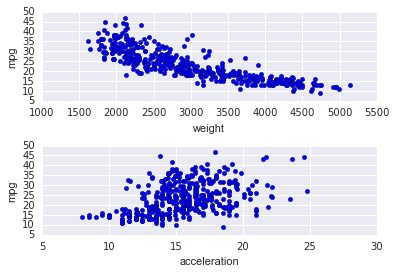

In [14]:
# plot the variables to see relationship
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig=plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.subplots_adjust(wspace=0, hspace=0.5)

ax1.scatter(cars['weight'],cars['mpg'])
ax1.set_ylabel('mpg')
ax1.set_xlabel('weight')
ax2.scatter(cars['acceleration'],cars['mpg'])
ax2.set_ylabel('mpg')
ax2.set_xlabel('acceleration')

sns.plt.show()

## Scikit-learn : Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

** Since scikit converts series and df to numpy objects, need to make sure that dimensions match**

In [8]:
# Single NumPy array (398 elements).
print(cars["weight"].values)
# NumPy matrix (398 rows by 1 column).
print(cars[["weight"]].values)

[ 3504.  3693.  3436.  3433.  3449.  4341.  4354.  4312.  4425.  3850.
  3563.  3609.  3761.  3086.  2372.  2833.  2774.  2587.  2130.  1835.
  2672.  2430.  2375.  2234.  2648.  4615.  4376.  4382.  4732.  2130.
  2264.  2228.  2046.  2634.  3439.  3329.  3302.  3288.  4209.  4464.
  4154.  4096.  4955.  4746.  5140.  2962.  2408.  3282.  3139.  2220.
  2123.  2074.  2065.  1773.  1613.  1834.  1955.  2278.  2126.  2254.
  2408.  2226.  4274.  4385.  4135.  4129.  3672.  4633.  4502.  4456.
  4422.  2330.  3892.  4098.  4294.  4077.  2933.  2511.  2979.  2189.
  2395.  2288.  2506.  2164.  2100.  4100.  3672.  3988.  4042.  3777.
  4952.  4464.  4363.  4237.  4735.  4951.  3821.  3121.  3278.  2945.
  3021.  2904.  1950.  4997.  4906.  4654.  4499.  2789.  2279.  2401.
  2379.  2124.  2310.  2472.  2265.  4082.  4278.  1867.  2158.  2582.
  2868.  3399.  2660.  2807.  3664.  3102.  2875.  2901.  3336.  1950.
  2451.  1836.  2542.  3781.  3632.  3613.  4141.  4699.  4457.  4638.
  4257

### Instantiate and fit the model

In [21]:
# Instantiate LR model
lr = LinearRegression()
# Train the model
lr.fit(cars[['weight']], cars[['mpg']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### See how well data has been trained

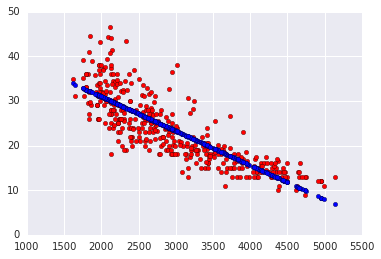

In [15]:
# See how well the data have been trained
predictions = lr.predict(cars[['weight']])

fig=plt.figure()
plt.scatter(cars[['weight']],cars[['mpg']], c='red',marker='o')
plt.scatter(cars[['weight']],predictions, c='blue',marker='o')
sns.plt.show()

In [17]:
# we can quantify the error by MSE
from sklearn import metrics
mse = metrics.mean_squared_error(cars[['mpg']],predictions)
print(mse)
rmse = mse**0.5
print(rmse)

18.7809397346
4.33369815915


## Cleaning the data for futher processing

In [23]:
# Drop the '?' rows for horsepower
filtered_cars = cars[cars['horsepower']!='?']
filtered_cars['horsepower']=filtered_cars['horsepower'].astype(float)
filtered_cars.head(5)

/Users/HyunJooHwang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [24]:
lr.fit(filtered_cars[['horsepower']], filtered_cars['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

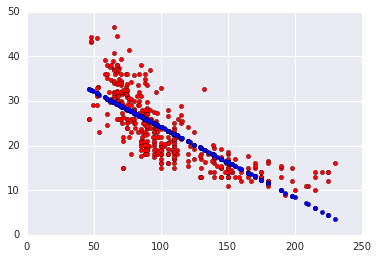

In [25]:
predictions = lr.predict(filtered_cars[['horsepower']])
plt.scatter(filtered_cars["horsepower"], filtered_cars["mpg"], c='red')
plt.scatter(filtered_cars["horsepower"], predictions, c='blue')
plt.show()

In [27]:
mse = metrics.mean_squared_error(predictions, filtered_cars[['mpg']])
rmse = mse ** 0.5
print mse, rmse

23.9436629386 4.89322623007


** above values indicate that prediction based on car weights has a smaller mse/rmse, thus better to use**